In [1]:
import pandas as pd
# 导入matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime

In [2]:
# 读取数据
today_world = pd.read_csv("today_world_2020_04_03.csv")
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_input':'累计输入病例','today_input':'当日输入病例'}

# 更改列名
today_world.rename(columns=name_dict,inplace=True)    # inplace参数判断是否在原数据上进行修改

# 缺失值处理
today_world['当日现存确诊'] = today_world['累计确诊']-today_world['累计治愈']-today_world['累计死亡']

In [4]:
print(today_world.head())

        编号                 更新时间    名称   累计确诊  累计疑似   累计治愈  累计死亡  累计重症  累计输入病例  \
0  9577772  2020-04-03 07:02:37   突尼斯    455     0      3    14     0     NaN   
1  9507896  2020-04-03 21:29:41  塞尔维亚   1476     0      0    89     0     NaN   
2        0  2020-04-03 22:02:41    中国  82858   135  76816  3331   379   873.0   
3        1  2020-04-03 11:25:22    日本   3834     0   1133    88     0     NaN   
4        2  2020-04-03 12:48:49    泰国   1978     0    581    19     0     NaN   

   当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  当日新增重症  当日现存确诊  当日输入病例  
0    32.0     0.0     0.0     2.0     0.0     438     NaN  
1   305.0     0.0     0.0    58.0     0.0    1387     NaN  
2   134.0    12.0   206.0     4.0     0.0    2711    32.0  
3   351.0     NaN     9.0     4.0     NaN    2613     NaN  
4   103.0     0.0    76.0     4.0     0.0    1378     NaN  


In [5]:
print(today_world.info())# 查看数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      201 non-null    object 
 1   更新时间    201 non-null    object 
 2   名称      201 non-null    object 
 3   累计确诊    201 non-null    int64  
 4   累计疑似    201 non-null    int64  
 5   累计治愈    201 non-null    int64  
 6   累计死亡    201 non-null    int64  
 7   累计重症    201 non-null    int64  
 8   累计输入病例  2 non-null      float64
 9   当日新增确诊  118 non-null    float64
 10  当日新增疑似  195 non-null    float64
 11  当日新增治愈  118 non-null    float64
 12  当日新增死亡  118 non-null    float64
 13  当日新增重症  195 non-null    float64
 14  当日现存确诊  201 non-null    int64  
 15  当日输入病例  2 non-null      float64
dtypes: float64(7), int64(6), object(3)
memory usage: 25.2+ KB
None


In [6]:
print(today_world.describe())# 默认只计算数值型特征的统计信息

                累计确诊        累计疑似          累计治愈          累计死亡        累计重症  \
count     201.000000  201.000000    201.000000    201.000000  201.000000   
mean     5154.398010    0.671642   1084.039801    272.855721    1.885572   
std     23040.006145    9.522166   6356.548246   1422.237074   26.732599   
min         1.000000    0.000000      0.000000      0.000000    0.000000   
25%        14.000000    0.000000      0.000000      0.000000    0.000000   
50%       141.000000    0.000000      4.000000      2.000000    0.000000   
75%      1024.000000    0.000000     57.000000     19.000000    0.000000   
max    245658.000000  135.000000  76816.000000  13915.000000  379.000000   

          累计输入病例        当日新增确诊      当日新增疑似       当日新增治愈      当日新增死亡  当日新增重症  \
count    2.00000    118.000000  195.000000   118.000000  118.000000   195.0   
mean   436.50000    592.330508    0.061538    99.550847   33.855932     0.0   
std    617.30422   2732.419916    0.859338   401.428637  136.012020     0.0   

In [7]:
# 计算缺失值比例
today_world_nan = today_world.isnull().sum()/len(today_world)
# 转变为百分数
print(today_world_nan.apply(lambda x: format(x, '.1%')) )

编号         0.0%
更新时间       0.0%
名称         0.0%
累计确诊       0.0%
累计疑似       0.0%
累计治愈       0.0%
累计死亡       0.0%
累计重症       0.0%
累计输入病例    99.0%
当日新增确诊    41.3%
当日新增疑似     3.0%
当日新增治愈    41.3%
当日新增死亡    41.3%
当日新增重症     3.0%
当日现存确诊     0.0%
当日输入病例    99.0%
dtype: object


In [9]:
# 计算病死率,且保留两位小数
today_world['病死率'] = (today_world['累计死亡']/today_world['累计确诊']).apply(lambda x: format(x, '.2f'))
# 将病死率数据类型转换为float
today_world['病死率'] = today_world['病死率'].astype('float')
# 根据病死率降序排序
today_world.sort_values('病死率',ascending=False,inplace=True)
print(today_world.head(10))# 显示病死率前十国家

         编号                 更新时间      名称  累计确诊  累计疑似  累计治愈  累计死亡  累计重症  \
139   95291  2020-04-03 02:38:20      苏丹     8     0     0     2     0   
117    8197  2020-04-01 08:38:13    博茨瓦纳     4     0     0     1     0   
124   95783  2020-03-30 09:33:45     冈比亚     4     0     0     1     0   
123   95787  2020-03-29 12:40:40    尼加拉瓜     4     0     0     1     0   
184  956789  2020-04-02 03:34:30     安哥拉     8     0     1     2     0   
185   87656  2020-03-27 11:32:45    开曼群岛     5     0     0     1     0   
120   95306  2020-03-31 00:00:31     佛得角     6     0     0     1     0   
78     8134  2020-04-03 07:03:00   毛里塔尼亚     6     0     2     1     0   
133  856671  2020-03-31 00:00:31  荷属安的列斯     7     0     0     1     0   
122   95303  2020-04-01 00:00:31     圭亚那     8     0     0     1     0   

     累计输入病例  当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  当日新增重症  当日现存确诊  当日输入病例   病死率  
139     NaN     1.0     0.0     0.0     0.0     0.0       6     NaN  0.25  
117     NaN     NaN     0.0     N

In [10]:
# 将国家名称设为索引
today_world.set_index('名称',inplace=True)
print(today_world.head(3))

print(today_world.loc['中国'])#可以通过传入列表获取指定国家的数据

         编号                 更新时间  累计确诊  累计疑似  累计治愈  累计死亡  累计重症  累计输入病例  \
名称                                                                       
苏丹    95291  2020-04-03 02:38:20     8     0     0     2     0     NaN   
博茨瓦纳   8197  2020-04-01 08:38:13     4     0     0     1     0     NaN   
冈比亚   95783  2020-03-30 09:33:45     4     0     0     1     0     NaN   

      当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  当日新增重症  当日现存确诊  当日输入病例   病死率  
名称                                                                  
苏丹       1.0     0.0     0.0     0.0     0.0       6     NaN  0.25  
博茨瓦纳     NaN     0.0     NaN     NaN     0.0       3     NaN  0.25  
冈比亚      NaN     0.0     NaN     NaN     0.0       3     NaN  0.25  
编号                          0
更新时间      2020-04-03 22:02:41
累计确诊                    82858
累计疑似                      135
累计治愈                    76816
累计死亡                     3331
累计重症                      379
累计输入病例                    873
当日新增确诊                    134
当日新增疑似        

In [11]:
# 查看当前累计确诊人数前十国家
world_top10 = today_world.sort_values(['累计确诊'],ascending=False)[:10]
world_top10 = world_top10[['累计确诊','累计死亡','病死率']]
print(world_top10)

       累计确诊   累计死亡   病死率
名称                      
美国   245658   6069  0.02
西班牙  117710  10935  0.09
意大利  115242  13915  0.12
德国    84788   1107  0.01
中国    82858   3331  0.04
法国    59929   5398  0.09
伊朗    53183   3294  0.06
英国    38168   3605  0.09
瑞士    19303    484  0.03
土耳其   18135    356  0.02


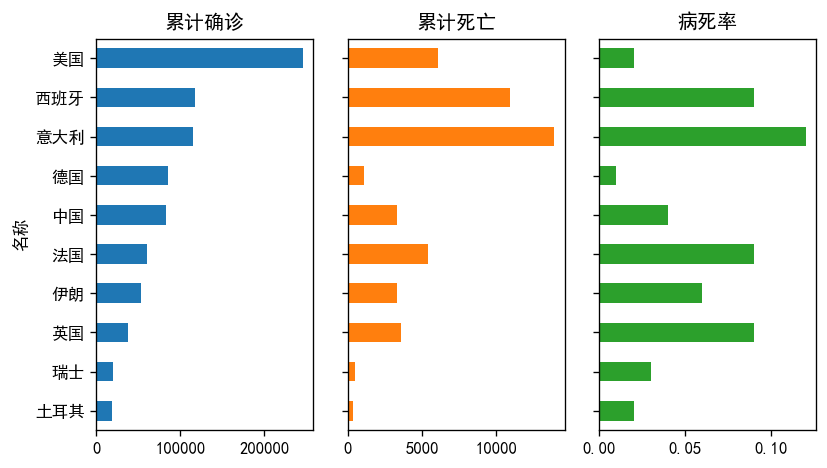

In [12]:
#绘图准备
plt.rcParams['font.sans-serif']=['SimHei']    #正常显示中文
plt.rcParams['figure.dpi'] = 120      #设置所有图片的清晰度
# 绘制条形图
world_top10.sort_values('累计确诊').plot.barh(subplots=True,layout=(1,3),sharex=False,
                                             figsize=(7,4),legend=False,sharey=True)
plt.tight_layout()   #调整子图间距
plt.show()


In [ ]:
###绘制省份情况

In [13]:
# 读取数据
today_province = pd.read_csv("today_province_2020_04_03.csv")
# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_input':'累计输入病例','today_input':'当日输入病例'}

# 更改列名
today_province.rename(columns=name_dict,inplace=True)    # inplace参数是否在原对象基础上进行修改
print(today_province.head())
print(today_province.info())# 查看数据基本信息
print(today_province.describe())# 查看数值型特征的统计量

       编号                 更新时间  名称   累计确诊  累计疑似   累计治愈  累计死亡  累计重症  累计输入病例  \
0  420000  2020-04-03 10:14:05  湖北  67802     0  63612  3203     0       0   
1  440000  2020-04-03 09:18:55  广东   1514     0   1368     8     0       0   
2  410000  2020-04-03 08:36:23  河南   1276     0   1251    22     0       0   
3  330000  2020-04-03 09:25:12  浙江   1260     0   1228     1     0       0   
4  430000  2020-04-03 08:52:05  湖南   1019     0   1014     4     0       0   

   当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  当日新增重症  当日现存确诊  当日输入病例  
0       0     NaN     141       4     NaN     NaN       0  
1       7     NaN       3       0     NaN     NaN       0  
2       0     NaN       0       0     NaN     NaN       0  
3       2     NaN       0       0     NaN     NaN       0  
4       0     NaN       0       0     NaN     NaN       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  --

In [14]:
# 计算各省当日现存确诊人数
today_province['当日现存确诊'] = today_province['累计确诊']-today_province['累计治愈']-today_province['累计死亡']
# 将各省名称设置为索引
today_province.set_index('名称',inplace=True)
print(today_province.info())

# 查看全国新增确诊top10的地区,new_top6 就是指代新增确诊的10个地区
new_top6 = today_province['当日新增确诊'].sort_values(ascending=False)[:10]
print(new_top6)

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 湖北 to 西藏
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      34 non-null     int64  
 1   更新时间    34 non-null     object 
 2   累计确诊    34 non-null     int64  
 3   累计疑似    34 non-null     int64  
 4   累计治愈    34 non-null     int64  
 5   累计死亡    34 non-null     int64  
 6   累计重症    34 non-null     int64  
 7   累计输入病例  34 non-null     int64  
 8   当日新增确诊  34 non-null     int64  
 9   当日新增疑似  3 non-null      float64
 10  当日新增治愈  34 non-null     int64  
 11  当日新增死亡  34 non-null     int64  
 12  当日新增重症  3 non-null      float64
 13  当日现存确诊  34 non-null     int64  
 14  当日输入病例  34 non-null     int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 4.2+ KB
None
名称
香港    80
台湾    19
广东     7
上海     4
福建     4
江苏     4
天津     4
山东     3
浙江     2
辽宁     1
Name: 当日新增确诊, dtype: int64


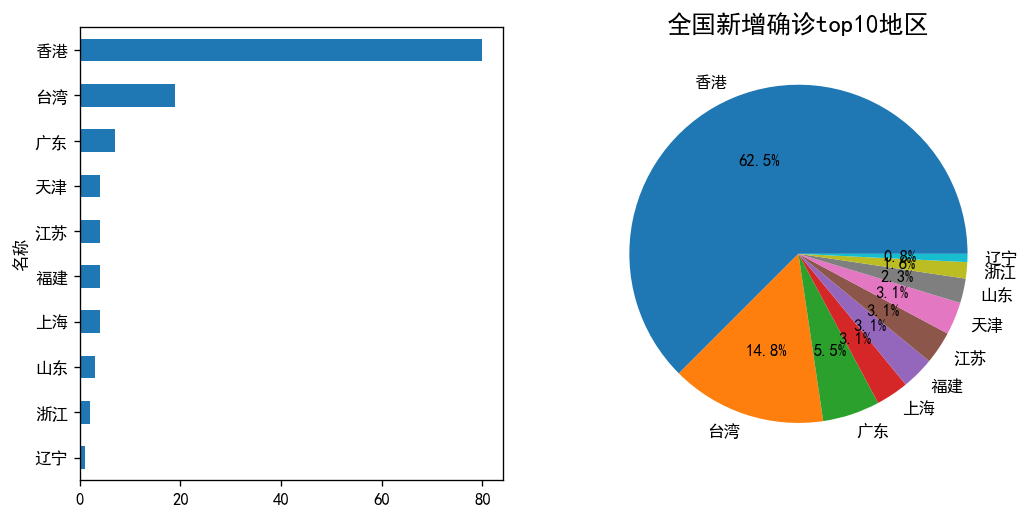

In [15]:
# 绘制条形图和饼图
fig,ax = plt.subplots(1,2,figsize=(10,5))
new_top6.sort_values(ascending=True).plot.barh(fontsize=10,ax=ax[0])
new_top6.plot.pie(autopct='%.1f%%',fontsize=10,ax=ax[1])
plt.ylabel('')
plt.title('全国新增确诊top10地区',size=15)
plt.show()

In [16]:
# 查看全国现存确诊人数top10的省市
store_top10 = today_province['当日现存确诊'].sort_values(ascending=False)[:10]
print(store_top10)

名称
湖北     987
香港     668
台湾     293
上海     172
北京     141
广东     138
福建      47
内蒙古     42
天津      37
澳门      32
Name: 当日现存确诊, dtype: int64


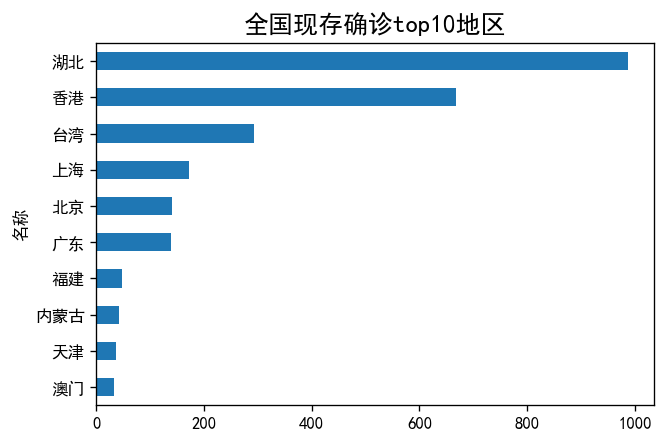

In [17]:
# 绘制条形图
store_top10.sort_values(ascending=True).plot.barh(fontsize=10)
plt.title('全国现存确诊top10地区',size=15)
plt.show()

In [25]:
#全国历史数据探索性分析
# 读取数据
alltime_china = pd.read_csv("alltime_China_2020_04_03.csv")

# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_input':'累计输入病例','today_input':'当日输入病例'}
# 更改列名
alltime_china.rename(columns=name_dict,inplace=True)
print(alltime_china.head())
print(alltime_china.info())
print(alltime_china.describe())

           日期  更新时间  累计确诊  累计疑似  累计治愈  累计死亡  累计重症  当日新增确诊  当日新增疑似  当日新增治愈  \
0  2020-01-20   NaN   291    54    25     6     0     291      27      25   
1  2020-01-21   NaN   440    37    25     9   102     149      26       0   
2  2020-01-22   NaN   571   393    28    17    95     131     257       3   
3  2020-01-23   NaN   830  1072    34    25   177     259     680       6   
4  2020-01-24   NaN  1287  1965    38    41   237     457    1118       4   

   当日新增死亡  当日新增重症  当日现存确诊  
0       6       0     NaN  
1       3       0     NaN  
2       8       0     NaN  
3       8       0     NaN  
4      16       0     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      74 non-null     object 
 1   更新时间    0 non-null      float64
 2   累计确诊    74 non-null     int64  
 3   累计疑似    74 non-null     int64  
 4   累计治愈    74 non-null     int64  
 5   累计

In [26]:
# 缺失值处理
# 计算当日现存确诊人数
alltime_china['当日现存确诊'] = alltime_china['累计确诊']-alltime_china['累计治愈']-alltime_china['累计死亡']
# 删除更新时间一列
alltime_china.drop(['更新时间','当日新增重症'],axis=1,inplace=True)
print(alltime_china.info())

# 将日期改成datetime格式
alltime_china['日期'] = pd.to_datetime(alltime_china['日期'])
# 设置日期为索引
alltime_china.set_index('日期',inplace=True)     # 也可使用pd.read_csv("./input/alltime_China_2020_03_27.csv",parse_dates=['date'],index_col='date')
print(alltime_china.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      74 non-null     object
 1   累计确诊    74 non-null     int64 
 2   累计疑似    74 non-null     int64 
 3   累计治愈    74 non-null     int64 
 4   累计死亡    74 non-null     int64 
 5   累计重症    74 non-null     int64 
 6   当日新增确诊  74 non-null     int64 
 7   当日新增疑似  74 non-null     int64 
 8   当日新增治愈  74 non-null     int64 
 9   当日新增死亡  74 non-null     int64 
 10  当日现存确诊  74 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 6.5+ KB
None
DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '20

In [27]:
# 举例
print(alltime_china.loc['2020-01'])

             累计确诊   累计疑似  累计治愈  累计死亡  累计重症  当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  \
日期                                                                           
2020-01-20    291     54    25     6     0     291      27      25       6   
2020-01-21    440     37    25     9   102     149      26       0       3   
2020-01-22    571    393    28    17    95     131     257       3       8   
2020-01-23    830   1072    34    25   177     259     680       6       8   
2020-01-24   1287   1965    38    41   237     457    1118       4      16   
2020-01-25   1975   2684    49    56   324     688    1309      11      15   
2020-01-26   2744   5794    51    80   461     769    3806       2      24   
2020-01-27   4515   6973    60   106   976    1771    2077       9      26   
2020-01-28   5974   9239   103   132  1239    1459    3248      43      26   
2020-01-29   7711  12167   124   170  1370    1737    4148      21      38   
2020-01-30   9692  15238   171   213  1527    1981    4812      

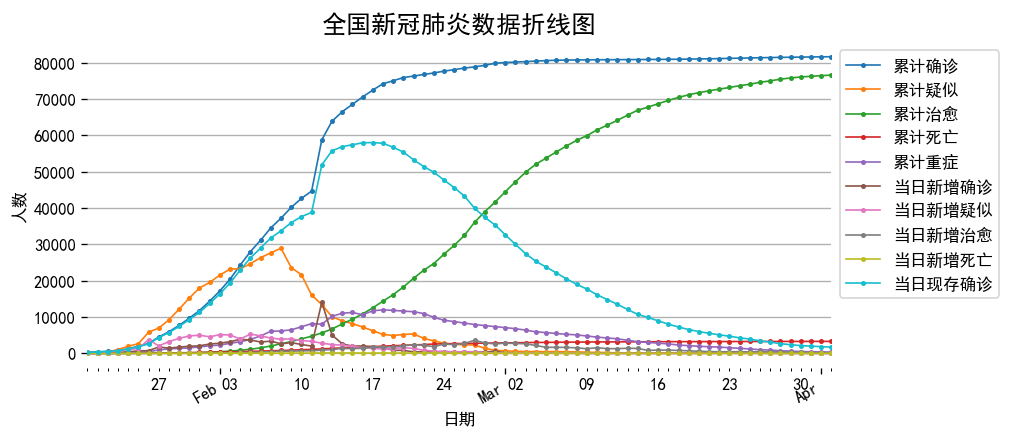

In [28]:
# 时间序列数据绘制折线图
fig, ax = plt.subplots(figsize=(8,4))
alltime_china.plot(marker='o',ms=2,lw=1,ax=ax)
ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式
fig.autofmt_xdate()    #自动调整日期倾斜
# 图例位置调整
plt.legend(bbox_to_anchor = [1,1])
plt.title('全国新冠肺炎数据折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.show()

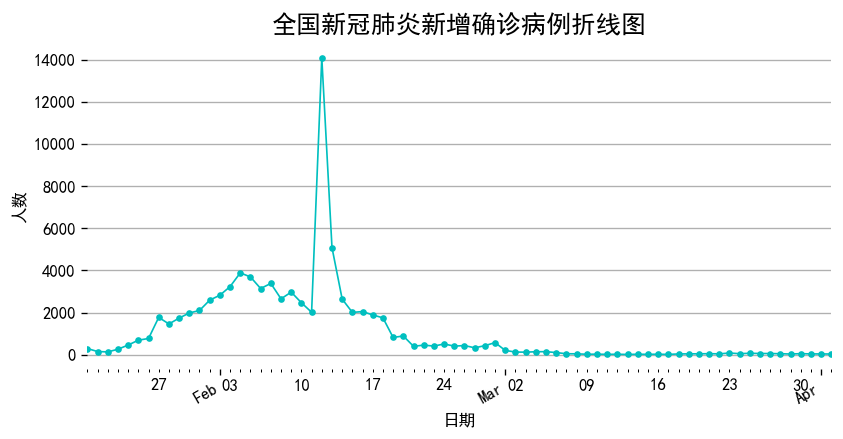

In [29]:
# 时间序列数据绘制折线图
fig, ax = plt.subplots(figsize=(8,4))
alltime_china['当日新增确诊'].plot(ax=ax, style='-',lw=1,color='c',marker='o',ms=3)
ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式
fig.autofmt_xdate()    #自动调整日期倾斜
plt.title('全国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.show()

In [30]:
#世界各国历史数据探索性分析
# 读取数据
alltime_world = pd.read_csv("alltime_world_2020_04_04.csv")
# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症',
             'total_input':'累计输入病例','today_input':'当日输入病例'}

# 更改列名
alltime_world.rename(columns=name_dict,inplace=True)
print(alltime_world.head())
print(alltime_world.info())# 查看数据基本信息
print(alltime_world.describe())

           日期  累计确诊  累计疑似  累计治愈  累计死亡  累计重症  当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  \
0  2020-03-03     1     0     0     0     0       1     0.0       0       0   
1  2020-03-08     2     0     0     0     0       1     0.0       0       0   
2  2020-03-09     5     0     0     0     0       3     0.0       0       0   
3  2020-03-11     7     0     0     0     0       2     0.0       0       0   
4  2020-03-12    13     0     0     0     0       6     0.0       0       0   

   当日新增重症  当日现存确诊   名称  
0     NaN     NaN  突尼斯  
1     0.0     NaN  突尼斯  
2     0.0     NaN  突尼斯  
3     0.0     NaN  突尼斯  
4     0.0     NaN  突尼斯  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      3612 non-null   object 
 1   累计确诊    3612 non-null   int64  
 2   累计疑似    3612 non-null   int64  
 3   累计治愈    3612 non-null   int64  
 4   累计死亡    3612 non-null   int64  
 5   累计重症

In [31]:
# 将日期一列数据类型变为datetime
alltime_world['日期'] = pd.to_datetime(alltime_world['日期'])
# 计算当日现存确诊
alltime_world['当日现存确诊'] = alltime_world['累计确诊']-alltime_world['累计治愈']-alltime_world['累计死亡']
print(alltime_world.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      3612 non-null   datetime64[ns]
 1   累计确诊    3612 non-null   int64         
 2   累计疑似    3612 non-null   int64         
 3   累计治愈    3612 non-null   int64         
 4   累计死亡    3612 non-null   int64         
 5   累计重症    3612 non-null   int64         
 6   当日新增确诊  3612 non-null   int64         
 7   当日新增疑似  3462 non-null   float64       
 8   当日新增治愈  3612 non-null   int64         
 9   当日新增死亡  3612 non-null   int64         
 10  当日新增重症  3062 non-null   float64       
 11  当日现存确诊  3612 non-null   int64         
 12  名称      3612 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 367.0+ KB
None


In [32]:
# 查看唯一值,可使用len()查看个数
alltime_world['名称'].unique()

# 统计每天有多少国家出现疫情，即哪20天疫情出现的最多
alltime_world['日期'].value_counts().head(20)

# 设置日期索引
alltime_world.set_index('日期',inplace=True)
# 3月31日数据统计不完全，我们将其删除
alltime_world = alltime_world.loc[:'2020-03-31']

# groupby创建层次化索引
data = alltime_world.groupby(['日期','名称']).mean()
print(data.head())

               累计确诊  累计疑似  累计治愈  累计死亡  累计重症  当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  \
日期         名称                                                                 
2020-01-20 韩国     1     0     0     0     0       1     0.0       0       0   
2020-01-21 韩国     1     0     0     0     0       0     0.0       0       0   
2020-01-22 韩国     1     0     0     0     0       0     0.0       0       0   
2020-01-23 韩国     1     0     0     0     0       0     0.0       0       0   
2020-01-24 韩国     2     0     0     0     0       1     0.0       0       0   

               当日新增重症  当日现存确诊  
日期         名称                  
2020-01-20 韩国     NaN       1  
2020-01-21 韩国     NaN       1  
2020-01-22 韩国     NaN       1  
2020-01-23 韩国     NaN       1  
2020-01-24 韩国     NaN       2  


In [33]:
# 提取部分数据
data_part = data.loc(axis=0)[:,['中国','日本','韩国','美国','意大利','英国','西班牙','德国']]
print(data_part.head())

# 将层级索引还原
data_part.reset_index('名称',inplace=True)
print(data_part.head())

               累计确诊  累计疑似  累计治愈  累计死亡  累计重症  当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  \
日期         名称                                                                 
2020-01-20 韩国     1     0     0     0     0       1     0.0       0       0   
2020-01-21 韩国     1     0     0     0     0       0     0.0       0       0   
2020-01-22 韩国     1     0     0     0     0       0     0.0       0       0   
2020-01-23 韩国     1     0     0     0     0       0     0.0       0       0   
2020-01-24 韩国     2     0     0     0     0       1     0.0       0       0   

               当日新增重症  当日现存确诊  
日期         名称                  
2020-01-20 韩国     NaN       1  
2020-01-21 韩国     NaN       1  
2020-01-22 韩国     NaN       1  
2020-01-23 韩国     NaN       1  
2020-01-24 韩国     NaN       2  
            名称  累计确诊  累计疑似  累计治愈  累计死亡  累计重症  当日新增确诊  当日新增疑似  当日新增治愈  当日新增死亡  \
日期                                                                             
2020-01-20  韩国     1     0     0     0     0       1     0.0  

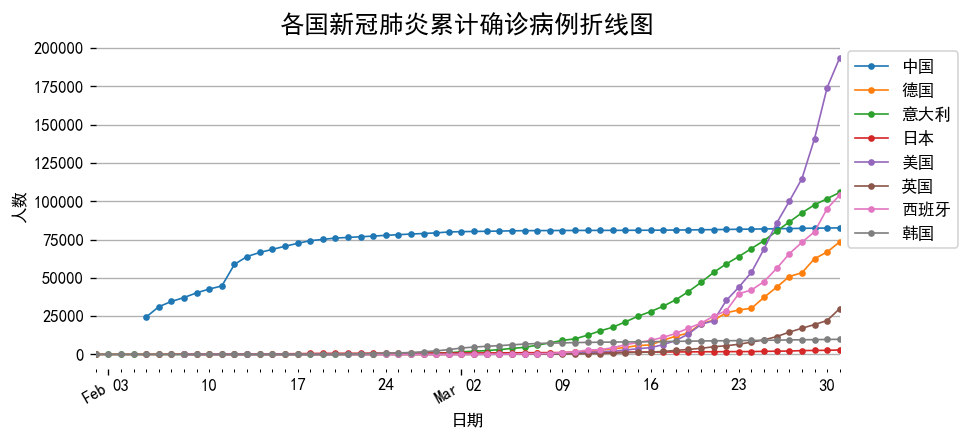

In [34]:
# 绘制多个国家的累计确诊人数折线图
fig, ax = plt.subplots(figsize=(8,4))
data_part['2020-02':].groupby('名称')['累计确诊'].plot(legend=True,marker='o',ms=3,lw=1)
ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式
fig.autofmt_xdate()    #自动调整日期倾斜
plt.title('各国新冠肺炎累计确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])
plt.show()

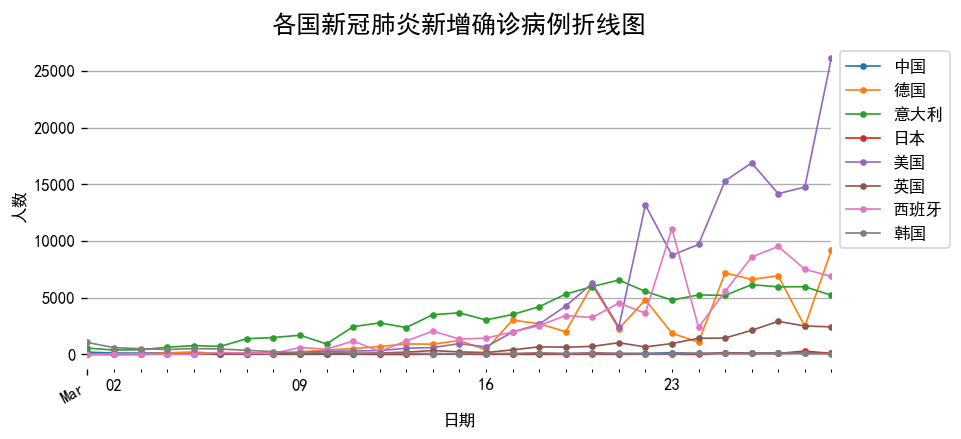

In [35]:
# 绘制各国新增确诊人数折线图
fig, ax = plt.subplots(figsize=(8,4))
data_part['2020-03':'2020-03-29'].groupby('名称')['当日新增确诊'].plot(legend=True,marker='o',ms=3,lw=1)
ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式
fig.autofmt_xdate()    #自动调整日期倾斜
plt.title('各国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])
plt.show()

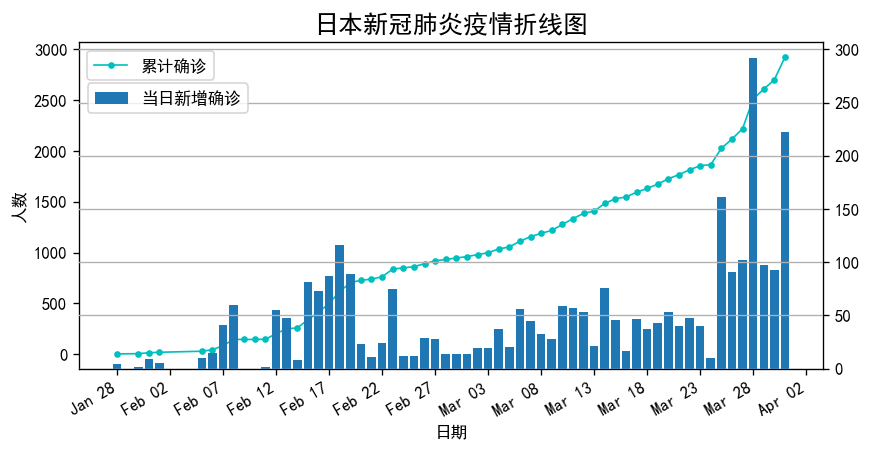

In [36]:
#绘制日本新冠肺炎疫情折线图
japan = alltime_world[alltime_world['名称']=='日本']
fig, ax = plt.subplots(figsize=(8,4))
japan['累计确诊'].plot(ax=ax, fontsize=10, style='-',lw=1,color='c',marker='o',ms=3,legend=True)
ax.set_ylabel('人数', fontsize=10)
ax1 = ax.twinx()
ax1.bar(japan.index, japan['当日新增确诊'])
ax1.xaxis.set_major_locator(dates.DayLocator(interval = 5))
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
ax1.legend(['当日新增确诊'],loc='upper left',bbox_to_anchor=(0.001, 0.9))
plt.grid(axis='y')
plt.box(False)
plt.title('日本新冠肺炎疫情折线图',size=15)
plt.show()
